In [1]:
import tensorflow as tf
print('versao do tensorflow:',tf.__version__)

versao do tensorflow: 2.9.1


In [2]:
#Carregue e prepare o conjunto de dados MNIST
mnist = tf.keras.datasets.mnist
(xtreino, ytreino), (xteste, yteste) = mnist.load_data()
xtreino, xteste = xtreino / 255.0, xteste / 255.0 #normalizaçao dos dados

In [3]:
type(xtreino)

numpy.ndarray

In [4]:
xtreino.shape

(60000, 28, 28)

In [5]:
# Add a channels dimension #Adiçao do canal de cor (escala de cinza)
xtreino = xtreino[..., tf.newaxis].astype("float32")
xteste = xteste[..., tf.newaxis].astype("float32")

In [6]:
xtreino.shape

(60000, 28, 28, 1)

In [7]:
#xtreino[0]

In [8]:
xteste.shape

(10000, 28, 28, 1)

In [9]:
ytreino.shape

(60000,)

In [10]:
yteste.shape

(10000,)

In [11]:
yteste

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [12]:
ytreinoonehot=tf.one_hot(ytreino,10) #one hot aplicado nos dados de treino
#ytreinoonehot

In [13]:
ytreinoonehot.shape

TensorShape([60000, 10])

In [14]:
ytesteonehot=tf.one_hot(yteste,10) #one hot aplicado nos dados de teste
#ytesteonehot

In [15]:
def conv2d(entrada,w,b):
    return tf.nn.relu(tf.nn.bias_add(tf.nn.conv2d(entrada,w,strides=[1,1,1,1],padding='VALID'),b)) #padding=VALID quer dizer que o padding nao sera utilizado

In [16]:
def maxpool(entrada1,k):
    return tf.nn.max_pool(entrada1, ksize=[1,k,k,1],strides=[1,k,k,1],padding='VALID')

In [17]:
#Inicializaçao dos pesos
w1=tf.Variable(tf.random.normal([5,5,1,32],0,0.05,tf.float32)) #camada interna1, filtro(kernel) 5x5, 1 imagem para varrer, 32 feature maps de saida, media zero e desvio padrao 0.05
w2=tf.Variable(tf.random.normal([5,5,32,64],0,0.05,tf.float32)) #camada interna2, filtro 5x5, 32 pooling layers da camada 1 para varrer, 64 fetaure maps de saida
w3=tf.Variable(tf.random.normal([4*4*64,80],0,0.05,tf.float32)) #64 poolings 4x4 dispostos em apenas 1 coluna (flatten) - Camada Densa de 80 neuronios #0.0063 desvio padrao Natanael
wout=tf.Variable(tf.random.normal([80,10],0,0.05,tf.float32)) #10 neuronios de saida conectados aos 80 neuronios da camada anterior #0.04 desvio padrao Natanael

In [18]:
#Inicializaçao dos bias
b1=tf.Variable(tf.zeros([32]))
b2=tf.Variable(tf.zeros([64]))
b3=tf.Variable(tf.zeros([80]))
bout=tf.Variable(tf.zeros([10]))

In [19]:
#Função de saida (resultado do modelo)
@tf.function
def saida(entrada,w1,w2,w3,wout,b1,b2,b3,bout):
    #Camada CNN1
    conv1=conv2d(entrada,w1,b1)
    pool1=maxpool(conv1,k=2)
    #Camada CNN2
    conv2=conv2d(pool1,w2,b2)
    pool2=maxpool(conv2,k=2)
    #Camada densa oculta
    convcoluna=tf.reshape(pool2, shape=[-1,w3.get_shape().as_list()[0]])
    densa1=tf.nn.relu(tf.add(tf.matmul(convcoluna, w3),b3))
    dropoutdensa=tf.nn.dropout(densa1,0.2)
    #Camda densa de saída
    saida=tf.add(tf.matmul(dropoutdensa,wout),bout)
    return saida
saida

In [20]:
#Função de custo
@tf.function
def cost(saida,gabtreino):
    error = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=saida, labels=gabtreino))
    return error
cost

In [21]:
#Otimizador
optimizer = tf.optimizers.Adam() #O otimizador Adam minimizou a oscilaçao da acurácia

In [22]:
trainable_vars = [w1,w2,w3,wout,b1,b2,b3,bout]

epoca1 custo:0.2792049050331116 acuracia treino:0.9171333312988281 acuracia teste:0.9236000180244446
tempo em segundos 117.8129506111145
epoca2 custo:0.1554601937532425 acuracia treino:0.9535833597183228 acuracia teste:0.9563999772071838
tempo em segundos 236.0345323085785
epoca3 custo:0.11098212003707886 acuracia treino:0.9672999978065491 acuracia teste:0.9677000045776367
tempo em segundos 353.0015480518341
epoca4 custo:0.08812035620212555 acuracia treino:0.9737833142280579 acuracia teste:0.9757999777793884
tempo em segundos 469.78835940361023
epoca5 custo:0.07570281624794006 acuracia treino:0.9771666526794434 acuracia teste:0.9789999723434448
tempo em segundos 587.1014273166656
epoca6 custo:0.06966295838356018 acuracia treino:0.9790666699409485 acuracia teste:0.9787999987602234
tempo em segundos 704.2940864562988
epoca7 custo:0.05855405330657959 acuracia treino:0.982283353805542 acuracia teste:0.9811000227928162
tempo em segundos 821.2623519897461
epoca8 custo:0.05113128200173378 acu

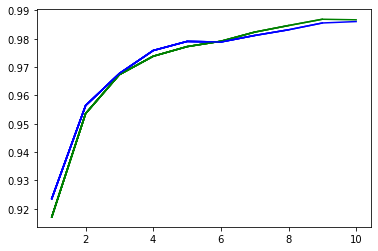

In [23]:
import time
import numpy as np
import matplotlib.pyplot as plt
x=[] #Lista para armazenar a quantidade de batches
y=0 #Complemento para Lista para armazenar a quantidade de batches
epochs = 10 #(or however many iterations you want it to run)
listacustotreino=[]
listaacurtreino=[]
listaacurteste=[]
tempoinicial=time.time()

for _ in range(epochs): #loop for das épocas
    y=y+1
    x.append(y)
    #print('epoca:',y)
    tamanhobatch=1000
    deltabatch=tamanhobatch #Mesmo valor que tamanhobatch, porem este numero nao varia dentro do loop for
    batches=60000/tamanhobatch
    batchesint=int(batches) #Quantidade de batches no formato integer (numero inteiro)
    #print('numero total de batches:',batchesint)
    m=0
    #Utilizar batches para fazer o calculo de custo e atualizaçao dos pesos e bias
    for n in range (batchesint): #Loop for de cada batch de forma a cobrir todos os dados
        #print('batch number:',n)
        listabatchesxtreino=[]
        listabatchesytreino=[]
        paramif=0
        for l in range (m,tamanhobatch): #Loop for das linhas dentro de um batch
            #print('Qtd de amostras:',l)
            listabatchesxtreino.append(xtreino[l]) #carrega trechos de amostras do banco de dados
            listabatchesytreino.append(ytreinoonehot[l]) #carrega trechos de amostras do banco de dados
            m=m+1
            paramif=paramif+1
            listabatchesxtreino1=np.array(listabatchesxtreino)
            listabatchesytreino1=np.array(listabatchesytreino)
            if paramif+1 > deltabatch:
                with tf.GradientTape() as tp:
                #your loss/cost function must always be contained within the gradient tape instantiation
                    saidatreino = saida(listabatchesxtreino1,w1,w2,w3,wout,b1,b2,b3,bout)
                    custotreino = cost(saidatreino,listabatchesytreino1)
                gradients = tp.gradient(custotreino, trainable_vars)
                optimizer.apply_gradients(zip(gradients, trainable_vars)) #Atualizaçao dos pesos e bias
        tamanhobatch=deltabatch+l+1
    
    #Acuracia treino para cada epoca
    saidatreino = saida(xtreino,w1,w2,w3,wout,b1,b2,b3,bout) #saida do modelo com os pesos e bias atualizados apos rodar todos os batches
    custotreino = cost(saidatreino,ytreinoonehot)
    verificacao=tf.equal(tf.argmax(saidatreino,1),tf.argmax(ytreinoonehot,1))
    acuraciatreino=tf.math.reduce_mean(tf.cast(verificacao,tf.float32))
    
    #Saida do modelo e acuracia do teste para cada epoca
    saidateste = saida(xteste,w1,w2,w3,wout,b1,b2,b3,bout)
    verificacao=tf.equal(tf.argmax(saidateste,1),tf.argmax(ytesteonehot,1))
    acuraciateste=tf.math.reduce_mean(tf.cast(verificacao,tf.float32))
    
    print(f'epoca{y}',f'custo:{custotreino}',f'acuracia treino:{acuraciatreino}',f'acuracia teste:{acuraciateste}')
    #listacustotreino.append(custotreino) #grafico custo x epocas
    #plt.plot(x, listacustotreino, '-g', label='Custo') #grafico custo x epocas
    listaacurtreino.append(acuraciatreino) #grafico acuracia treino x epocas
    #print('lista acuracia treino:',listaacurtreino)
    plt.plot(x, listaacurtreino, '-g', label='Custo') #grafico acuracia treino x epocas
    listaacurteste.append(acuraciateste) #grafico acuracia teste x epocas
    plt.plot(x, listaacurteste, '-b', label='Custo') #grafico acuracia teste x epocas
    
    tempofinal=time.time()
    tf.print('tempo em segundos', tempofinal - tempoinicial)